# Классификация текстов на позитивные и негативные

---

**Входные данные**

Набор текстов с разметкой о токсичности.

---

**Цель**

Создать модель для классификации текстов на позитивные и негативные.

---

**Задачи:**  

- проверить качество разметки данных;
- сделать обработку текстов, удалив из них лишнюю информацию (служебные данные, знаки препинания и т. п.);
- построить пайплайн с использованием TfidfVectorizer();  
- учесть в пайплайне возможность обработки дополнительных признаков;
- построить несколько различных моделей;
- выбрать лучшую модель;
- оценить качество моделей по дополнительным метрикам;
- сделать контрольную проверку на тестовой выборке;
- сформулировать рекомендации для дальнейшего развития проекта.

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Initial" data-toc-modified-id="Initial-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Constants" data-toc-modified-id="Constants-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Settings" data-toc-modified-id="Settings-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Settings</a></span></li></ul></li><li><span><a href="#Read-and-Check-data" data-toc-modified-id="Read-and-Check-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read and Check data</a></span><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Небольшие-улучшения-данных" data-toc-modified-id="Небольшие-улучшения-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Небольшие улучшения данных</a></span></li><li><span><a href="#Проверка-корректности-разметки-данных" data-toc-modified-id="Проверка-корректности-разметки-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка корректности разметки данных</a></span><ul class="toc-item"><li><span><a href="#Употребление-восклицательного-знака" data-toc-modified-id="Употребление-восклицательного-знака-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Употребление восклицательного знака</a></span></li><li><span><a href="#Употребление-вопросительного-знака" data-toc-modified-id="Употребление-вопросительного-знака-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Употребление вопросительного знака</a></span></li><li><span><a href="#Употребление-заглавных-букв" data-toc-modified-id="Употребление-заглавных-букв-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Употребление заглавных букв</a></span></li></ul></li><li><span><a href="#Небольшие-улучшения-данных-(продолжение)" data-toc-modified-id="Небольшие-улучшения-данных-(продолжение)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Небольшие улучшения данных (продолжение)</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Очистка,-токенизация,-лемматизация" data-toc-modified-id="Очистка,-токенизация,-лемматизация-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Очистка, токенизация, лемматизация</a></span></li><li><span><a href="#Выделение-признаков-и-целевой-переменной" data-toc-modified-id="Выделение-признаков-и-целевой-переменной-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выделение признаков и целевой переменной</a></span></li><li><span><a href="#Разделение-на-обучающую-и-валидационную-выборки" data-toc-modified-id="Разделение-на-обучающую-и-валидационную-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Разделение на обучающую и валидационную выборки</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Селекторы-числовых-и-категориальных-признаков" data-toc-modified-id="Селекторы-числовых-и-категориальных-признаков-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Селекторы числовых и категориальных признаков</a></span></li><li><span><a href="#Предбработка-числовых-признаков" data-toc-modified-id="Предбработка-числовых-признаков-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Предбработка числовых признаков</a></span></li><li><span><a href="#Предбработка-текста" data-toc-modified-id="Предбработка-текста-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Предбработка текста</a></span></li><li><span><a href="#Объединение-предобработки-текста-и-числовых-признаков" data-toc-modified-id="Объединение-предобработки-текста-и-числовых-признаков-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Объединение предобработки текста и числовых признаков</a></span></li><li><span><a href="#Pipelines'-table" data-toc-modified-id="Pipelines'-table-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Pipelines' table</a></span></li></ul></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#Objective-functions-для-Optuna" data-toc-modified-id="Objective-functions-для-Optuna-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Objective functions для Optuna</a></span></li><li><span><a href="#Optuna-call" data-toc-modified-id="Optuna-call-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Optuna call</a></span></li><li><span><a href="#Визуализация-результатов-подбора-гиперпараметров" data-toc-modified-id="Визуализация-результатов-подбора-гиперпараметров-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Визуализация результатов подбора гиперпараметров</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Additional-metrics" data-toc-modified-id="Additional-metrics-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Additional metrics</a></span></li><li><span><a href="#Confusion-Matrix-Display" data-toc-modified-id="Confusion-Matrix-Display-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Confusion Matrix Display</a></span></li><li><span><a href="#Class-Prediction-Error" data-toc-modified-id="Class-Prediction-Error-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Class Prediction Error</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Краткий-обзор-проделанной-работы" data-toc-modified-id="Краткий-обзор-проделанной-работы-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Краткий обзор проделанной работы</a></span></li><li><span><a href="#Проверка-и-подготовка-данных" data-toc-modified-id="Проверка-и-подготовка-данных-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Проверка и подготовка данных</a></span></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Моделирование</a></span></li><li><span><a href="#Риски-и-рекомендации" data-toc-modified-id="Риски-и-рекомендации-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Риски и рекомендации</a></span></li></ul></li></ul></div>

---

## Intro

**Пояснения**

---

Постоянные таблицы с данными начинаются со слова **data** .  
Временные таблицы с данными начинаются со слова **df** .  

---

Код ячеек максимально независим друг от друга, чтобы свободно манипулировать ячейками.

---

Промежуточные выводы выделены так:

> Промежуточный вывод.

---

## Initial

### Imports

In [1]:
import pandas as pd
import numpy as np

import os
import json
import re
import warnings
import joblib
from tqdm.notebook import tqdm
tqdm.pandas()  # новая фишка, оставил пока здесь, чтобы не забыть

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import plotly.io as pio

from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, SplineTransformer, FunctionTransformer

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

import optuna
from optuna.distributions import FloatDistribution, IntDistribution, CategoricalDistribution

from sklearn.metrics import f1_score, ConfusionMatrixDisplay
from yellowbrick.classifier import PrecisionRecallCurve, ClassPredictionError, ROCAUC

### Constants

In [2]:
# common constants

PATH_LOCAL = 'datasets/'                               # local path to data
PATH_REMOTE = '/datasets/'                             # remote path to data
CR = '\n'                                              # new line
RS = RANDOM_STATE = RANDOM_SEED = 88                   # random_state

In [3]:
# model

TARGET = 'toxic'                                       # target name
SCORING = 'f1'                                         # target metric
VALID_FRAC = 0.3                                       # delayed sampling fraction
N_CV = 10                                              # number of folds during cross-validation

N_TRIALS = 100                                         # max of tries when Optuna optimization run
TIMEOUT = 600                                          # max time when Optuna optimization run

In [4]:
# estimators list (comment/uncomment estimator to skip/use)

ESTIMATOR_LIST = [
#                   'DummyClassifier',
                  'LogisticRegression',
                  'RidgeClassifier',
                  'SGDClassifier',
                  'LinearSVC',
#                   'XGBClassifier',
                 ]

### Functions

In [5]:
def custom_read_csv(file_name, separator=','):
    '''
    reading dataset of .csv format:
       first from local storage;
       if unsuccessful from remote storage.
    '''

    path_local = f'{PATH_LOCAL}{file_name}'
    path_remote = f'{PATH_REMOTE}{file_name}'
    
    if os.path.exists(path_local):
        return pd.read_csv(path_local, sep=separator)

    elif os.path.exists(path_remote):
        return pd.read_csv(path_remote, sep=separator)

    else:
        print(f'File "{file_name}" not found at the specified path ')

In [6]:
def var_name(var):
    '''
    var name determination
    '''
    return [name for name in globals() if globals()[name] is var][0]

In [7]:
def basic_info(df: pd.DataFrame, sample_type='sample', samples=5, describe='all'):
    '''
    first info about dataframe: info(), sample()/head()/tail(), describe()
    '''
    
    # title (name of dataframe)
    
    print(f'\n\n {f.BOLD}{var_name(df)}{f.END}', '≋'*30)


    # method info()
    
    print('\n\n--- method info() ---\n')
    print(df.info())

    
    # several random records
    
    print(f'\n\n--- method {sample_type}({samples}) ---')
    
    if sample_type == 'sample':
        display(df.sample(samples))
    elif sample_type == 'head':
        display(df.head(samples))
    elif sample_type == 'tail':
        display(df.tail(samples))
    else:
        print(f'{sample_type} – invalid value for parameter "sample_type" ')
    
    
    # method describe()
    
    print(f'\n\n--- method describe({describe}) ---')
    
    if describe=='all' or describe=='numeric':
        try:
            display(df.describe(include=np.number))
        except ValueError:
            pass

    if describe=='all' or describe=='categorical':
        try:
            display(df.describe(exclude=np.number).T)
        except ValueError:
            pass
    
    if describe not in ['numeric','categorical','all']:
        print(f'{describe} – invalid value for parameter "describe" ')

In [8]:
def plot_Optuna(study, plot_kind='plot_slice', model_name=''):
    '''
    Дополнительная настройка оригинальных графиков Optuna.
    Например, на графике `plot_slice` изначально цвет точек зависел от номера итерации.
    Теперь они все одинакового цвета и полупрозрачные, лучше видны скопления точек.
    
    study: обученный объект класса OptunaSearchCV
    plot_kind: тип графика Optuna
    model_name: название модели
    '''
    
    if plot_kind == 'plot_slice':
        fig = optuna.visualization.plot_slice(study)
        fig.update_traces(
                          marker_color='Darkgrey',
                          marker_size=3,
                          marker_opacity=0.2,
                          marker_line_width=1,
                          marker_line_color='Black',
                         )
    
    elif plot_kind == 'plot_param_importances':
        fig = optuna.visualization.plot_param_importances(study)
        
    elif plot_kind == 'plot_optimization_history':
        fig = optuna.visualization.plot_optimization_history(study)
        fig.update_traces(
                          marker_size=5,
                          marker_opacity=0.3,
                          marker_line_width=1,
                          marker_line_color='Black',
                         )

    fig.update_layout(
                      title_text=model_name,
                      title_x=0,
                      font_size=10,
                     )    
    fig.show()

In [9]:
def add_model_metrics(models, X_train, Y_train, X_valid, Y_valid, cv=N_CV, scoring_list=['f1'], verbose=True):
    '''
    Принимает:
        датафрейм со списком моделей и их характеристиками;
        два датасета (features and target) – обучающую и валидационную выборки;
        параметр cv для cross_val_score;
        список метрик
        
    Для каждой модели в датафрейме добавляет указанные метрики для обоих датасетов.
    '''

    def cv_score(model, X, Y, scoring, cv):
        invert_koeff = -1 if scoring.split('_')[0] == 'neg' else 1   # инвертирование метрик с приставкой "neg_"
        return invert_koeff * cross_val_score(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1).mean()
    
    if verbose: print(f'Performing cross_val_score with cv={N_CV} and scoring_list={scoring_list}:')
    
    for scoring in scoring_list:
    
        # результаты моделей на обучающей выборке (усреднение на кроссвалидации)
        if verbose: print(f'{scoring}_train...', end=' ')
        models[f'{scoring}_train'] = models.model.apply(cv_score, args=(X_train, Y_train, scoring, cv))
        if verbose: print('done')

        # результаты моделей на тестовой выборке (усреднение на кроссвалидации)
        if verbose: print(f'{scoring}_test...', end=' ')
        models[f'{scoring}_test'] = models.model.apply(cv_score , args=(X_valid, Y_valid, scoring, cv))
        if verbose: print('done')
    
    # оптимальные гиперпараметры
    models['best_params'] = models.study.apply(lambda model: model.best_params)
    
    return models

In [10]:
def extract_final_features(pipeline_model):
    '''
    Принимает пайплайн.
    Возвращает список признаков, на которых обучается финальный estimator пайплайна.
    '''
    feature_list = []
    
    for feature in pipeline_model.steps[-2][1].get_feature_names_out():
        feature_list.append(feature.split('__')[1])

    return feature_list

### Settings

In [11]:
# text styles
class f:
    BOLD = "\033[1m"
    ITALIC = "\033[3m"
    END = "\033[0m"

In [12]:
# charts defaults

# Matplotlib, Seaborn
PLOT_DPI = 150  # dpi for charts rendering 
sns.set_style('whitegrid', {'axes.facecolor': '0.98', 'grid.color': '0.9', 'axes.edgecolor': '1.0'})
plt.rc(
       'axes',
       labelweight='bold',
       titlesize=16,
       titlepad=10,
      )

# Plotly Graph_Objects
pio.templates['my_theme'] = go.layout.Template(
                                               layout_autosize=True,
                                               # width=900,
                                               layout_height=200,
                                               layout_legend_orientation="h",
                                               layout_margin=dict(t=40, b=40),         # (l=0, r=0, b=0, t=0, pad=0)
                                               layout_template='seaborn',
                                              )
pio.templates.default = 'my_theme'

# colors, color schemes
CMAP_SYMMETRIC = LinearSegmentedColormap.from_list('', ['steelblue', 'aliceblue', 'steelblue'])

In [13]:
# Pandas defaults
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.colheader_justify = 'left'

In [14]:
# Optuna defaults
optuna.logging.set_verbosity(optuna.logging.WARNING)  # отключение вывода логов при работе optuna

In [15]:
# others
warnings.filterwarnings('ignore')

---

## Read and Check data

### Read data

In [16]:
data = custom_read_csv('toxic_comments.csv')

In [17]:
basic_info(data)



 data ≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋


--- method info() ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159291 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB
None


--- method sample(5) ---


,Unnamed: 0,text,toxic
48569,48624,", 20 September 2014 (UTC)\nComment Russia Today is about as far from WP:RS as a source can be. U...",0
44362,44415,I am a student at Criminal Law. I have never heard of the above alleged laws posted by a Purrum.,0
152661,152818,"I think it's a good point which is brought up here, but it just looks like grasping at straws.\n...",0
9372,9385,"when,i have time,i will reorganize the article,and help you in writing it.",0
29596,29635,"That page was listed a couple of days ago, but I didn't had time to check it. Anyway, I see the ...",0




--- method describe(all) ---


,Unnamed: 0,toxic
count,159292.000,159292.000
mean,79725.697,0.102
std,46028.837,0.302
min,0.000,0.000
25%,39872.750,0.000
50%,79721.500,0.000
75%,119573.250,0.000
max,159450.000,1.000


,count,unique,top,freq
text,159291,159243,Ошибка:509,37


> Лишняя колонка (вероятно, индекс) `Unnamed: 0`. Удалить.
> 
> Поле `text` содержит служебные сообщения. Например, `Ошибка:509`. Очистить.  
> Поле `text` содержит 1 пропущенное значение. Удалить.

> Целевой признак `toxic` несбалансирован, соотношение примерно 10:1.

### Небольшие улучшения данных

Датафрейм до очистки.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159291 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


Удаление колонки со старым индексом.

In [19]:
data = data.drop('Unnamed: 0', axis=1)

Удаление записей с пропущенными значениями.

In [20]:
data = data.dropna()

Удаление записей со служебными значениями в поле `text`.

In [21]:
data[data.text.str.contains('Ошибка:')].shape[0]

53

In [22]:
data = data[~data.text.str.contains('Ошибка:')].reset_index(drop=True)

In [23]:
data[data.text.str.contains('Ошибка')].shape[0]

0

> Удалено поле со старым (ненужным) индексом.  
> Удалены записи с пропущенными значениями.  
> Удалены записи со служебными сообщениями.  

Датафрейм после очистки.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159238 entries, 0 to 159237
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159238 non-null  object
 1   toxic   159238 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


### Проверка корректности разметки данных

Вычислим в тексте сначала количество, а затем долю:  
- восклицательных знаков;
- вопросительных знаков;
- заглавных букв.

Сравним тексты, которые размечены как `toxic=0` и как `toxic=1`.

In [25]:
# употребление восклицательного знака
data['exclamation_count'] = data.text.str.count('!')
data['exclamation_frac'] = data['exclamation_count'] / data['text'].str.len()

# употребление вопросительного знака
data['question_count'] = data.text.str.count('\?')
data['question_frac'] = data['question_count'] / data['text'].str.len()

# употребление заглавных букв
data['uppercase_count'] = data.text.apply(lambda text: sum(1 for char in text if char.isupper()))
data['uppercase_frac'] = data['uppercase_count'] / data['text'].str.len()

#### Употребление восклицательного знака

In [26]:
data[data.toxic == 0][['text','exclamation_frac','toxic']].sort_values('exclamation_frac', ascending=False).head()

,text,exclamation_frac,toxic
135860,hi trextori12 ) I♥♥♥u girl!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,0.917,0
48765,"Wikipedia, I have one itty bitty question. LEAVE MY EDITS ALONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...",0.886,0
76257,The Best \n\nBode Miller is the best skier in the WORLD!!!!!!!!!!!!!!!!!!!!!!!!!!!\n!!!!!!!!!!!!...,0.812,0
81296,i didnt get pranked hahaha!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,0.752,0
152458,Leave me alone!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,0.741,0


In [27]:
data.query('exclamation_frac > 0.5 or exclamation_count > 5').groupby('toxic').size()

toxic
0    809
1    788
dtype: int64

#### Употребление вопросительного знака

In [28]:
data[data.toxic == 0][['text','question_frac','toxic']].sort_values('question_frac', ascending=False).head()

,text,question_frac,toxic
8078,Why do people care so much about immiagtion?????????????????????????????????????????????????????...,0.598,0
5525,Silly games? \n\nIm sorry but what did I DO???????????????????????????????????????????????????????,0.583,0
125415,Wich principle i do not respect???????????????????????????????????????????????? ( ),0.571,0
81776,Why! Have I Been Wikipedia:Blocked?\n????????????????????????????????????????\n',0.526,0
132963,"???????????????????? \n\nIsn't it, though? lol",0.477,0


In [29]:
data.query('toxic == 0 and (question_frac > 0.5 or question_count > 5)').shape[0]

954

In [30]:
data.query('question_frac > 0.5 or question_count > 5').groupby('toxic').size()

toxic
0    954
1    214
dtype: int64

#### Употребление заглавных букв

In [31]:
data[data.toxic == 0][['text','uppercase_frac','toxic']].sort_values('uppercase_frac', ascending=False).head()

,text,uppercase_frac,toxic
71438,MRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR KENNNNNNNNNNNNNNNNNNNNNNNNNNNNNNEDD...,0.963,0
22608,"""\n\n find the """"W"""" \n\nMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...",0.950,0
127934,toolLONG LIVE ANONYMOUS PHILIPPINESLONG LIVE ANONYMOUS PHILIPPINESLONG LIVE ANONYMOUS PHILIPPINE...,0.903,0
35237,MarxismLONG LIVE ANONYMOUS PHILIPPINESLONG LIVE ANONYMOUS PHILIPPINESLONG LIVE ANONYMOUS PHILIPP...,0.902,0
38858,easterLONG LIVE ANONYMOUS PHILIPPINESLONG LIVE ANONYMOUS PHILIPPINESLONG LIVE ANONYMOUS PHILIPPI...,0.901,0


In [32]:
data.query('uppercase_frac > 0.5 or uppercase_count > 50').groupby('toxic').size()

toxic
0    6417
1    2122
dtype: int64

> Очевидно, часть данных размечена неверно.  
> Например, не отмечены как токсичные некоторые комментарии c:
> - многократным повтором одной и той же фразы;
> - чрезмерным использованим восклицательных и вопросительных знаков;
> - чрезмерным использованим заглавных букв;
> - содержащие агрессивные высказываания.

> Для оценки масштаба вероятных ошибок подсчитано количество текстов, размеченных как `toxic=0`, в которых:  
> - доля символов `!` больше 50% длины текста либо количество `!` больше 5;
> - доля символов `?` больше 50% длины текста либо количество `?` больше 5;
> - доля `CAPS` больше 50% длины текста либо количество `CAPS` больше 50.
>
> Суммарно, по меньшей мере, 6% данных предположительно размечены неверно.

> *Следует сделать оговорку, что критерии "токсичности" в задании не определены.*

In [33]:
data = data.drop(['exclamation_count','question_count','uppercase_count',
                  'exclamation_frac','question_frac','uppercase_frac'], axis=1)

> Использование этих новых признаков практически не влияет на модель (проверено!) ввиду описанных выше ошибок в разметке.

### Небольшие улучшения данных (продолжение)

Перевод в нижний регистр.

In [34]:
data.text = data.text.str.lower()

Удаление дубликатов.

In [35]:
data.duplicated(subset=['text']).sum()

46

In [36]:
data = data.drop_duplicates(subset=['text'], ignore_index=False)

In [37]:
data.duplicated(subset=['text']).sum()

0

> Значения переведены в нижний регистр.  
> Удалены дубликаты, в том числе 1 неявный (одинаковые значения в поле `text`, но разные в поле `toxic`).

---

## Подготовка данных

### Очистка, токенизация, лемматизация

In [38]:
def clean_text(text):
    '''
    Принимает объект типа string.
    Удаляет из него все символы, кроме стандартных символов латиницы и пробела.
    Возвращает объект типа string.
    '''
    return re.sub(r"[^a-zA-Z ]", ' ', text)

In [ ]:
def get_wordnet_pos(word):
    '''
    Map POS tag to first character lemmatize() accepts
    '''
    tag = nltk.pos_tag([word])[0][1][0].upper()
    
    tag_dict = {'J': wordnet.ADJ,
                'N': wordnet.NOUN,
                'V': wordnet.VERB,
                'R': wordnet.ADV}
    
    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
def tokenize_lemmatize_text(text):
    '''
    Принимает объект типа string.
    Производит токенизацию и лемматизацию.
    Возвращает объект типа string.
    '''
    text_tokenized = TweetTokenizer().tokenize(text)
    text_lemmatized = [WordNetLemmatizer().lemmatize(word, get_wordnet_pos(word)) for word in text_tokenized]
    
    return ' '.join(text_lemmatized)

> Использование POS-тегов в данной задаче дает едва заметное улучшение, но существенно замедляет обработку!

In [40]:
%%time

data.text = data.text.apply(clean_text).progress_apply(tokenize_lemmatize_text)

  0%|          | 0/159192 [00:00<?, ?it/s]

CPU times: total: 1min 19s
Wall time: 1min 25s


In [41]:
data.sample(5)

,text,toxic
58933,pov v npov hi from the arab israeli conflict page i ve noticed you just removed a statement abou...,0
71481,that s a pretty cool story bro,0
118865,would you like to vote in that case if yes please vote here thanks,0
123936,sandydancer you re not even maltese how do you expect to correctly edit a page about a person wh...,0
24028,a kitten for you thank you for your support,0


### Выделение признаков и целевой переменной

In [42]:
X = data.drop(TARGET, axis=1)
Y = data[TARGET]

X.shape, Y.shape

((159192, 1), (159192,))

### Разделение на обучающую и валидационную выборки

Валидационная выборка – часть, отрезанная от train, для локального тестирования модели.

In [43]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=VALID_FRAC, stratify=Y, random_state=RS)

X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((111434, 1), (111434,), (47758, 1), (47758,))

---

## Model

### Preprocessing

Препроцессинг несколько сложнее, чем требует задача, чтобы расширить примененимость кода для случаев, когда есть дополнительные признаки.  
В препроцессинге нет трансформера для категориальных признаков (селектор есть). При необходимости нужно доделать.

In [44]:
class TextSelector(BaseEstimator, TransformerMixin):
    '''
    Позволяет выбрать указанный признак для последующей обработки
    '''
    def __init__(self, field):
        self.field = field
    def fit(self, X, Y=None):
        return self
    def transform(self, X):
        return X[self.field]

#### Селекторы числовых и категориальных признаков

In [45]:
num_selector = make_column_selector(dtype_include=np.number)
cat_selector = make_column_selector(dtype_exclude=np.number)

#### Предбработка числовых признаков

In [46]:
num_preprocessor = make_pipeline(
#                                  IterativeImputer(initial_strategy='mean', random_state=RS),
                                 StandardScaler(),
                                )

num_transformer = make_column_transformer(
                                          (num_preprocessor, num_selector),
                                          remainder='drop'
                                         )

#### Предбработка текста

In [47]:
# стандартный список стоп-слов
stopwords_english = stopwords.words('english')

In [48]:
text_transformer = Pipeline([
                              ('TEXT_SELECT', TextSelector('text')),
                              ('TFIDF', TfidfVectorizer(
                                                        decode_error='ignore',
                                                        stop_words=stopwords_english,
                                                        token_pattern=r'(?u)\b[a-z]{3,}\b',  # токены из 3-х и более букв
                                                       )
                              ),
                             ])

#### Объединение предобработки текста и числовых признаков

In [49]:
features_union = FeatureUnion([
                               ('TEXT', text_transformer),
                               ('NUM', num_transformer),
                              ])

#### Pipelines' table

In [50]:
pipelines = [
             Pipeline([
                       ('FU', features_union),
                       ('DC', DummyClassifier())
                      ]),

             Pipeline([
                       ('FU', features_union),
                       ('LR', LogisticRegression(random_state=RS))
                      ]),

             Pipeline([
                       ('FU', features_union),
                       ('RC', RidgeClassifier(random_state=RS))
                      ]),

             Pipeline([
                       ('FU', features_union),
                       ('SGDC', SGDClassifier(random_state=RS))
                      ]),

             Pipeline([
                       ('FU', features_union),
                       ('LSVC', LinearSVC(random_state=RS))
                      ]),
    
             Pipeline([
                       ('FU', features_union),
                       ('XGBC', XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=RS))
                      ]),
            ]

names = ['DummyClassifier', 'LogisticRegression', 'RidgeClassifier', 'SGDClassifier', 'LinearSVC', 'XGBClassifier']

short_names = ['DC', 'LR', 'RC', 'SGDC', 'LSVC', 'XGBC']

models = pd.DataFrame(
                      data={'name': names,
                            'short_name': short_names,
                            'model': pipelines,
                           },
                     )
models

,name,short_name,model
0,DummyClassifier,DC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
1,LogisticRegression,LR,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
2,RidgeClassifier,RC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
3,SGDClassifier,SGDC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
4,LinearSVC,LSVC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
5,XGBClassifier,XGBC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."


В таблице моделей необходимо оставить только те, что есть в списке ESTIMATOR_LIST (то есть удалить лишние).

In [51]:
for item in range(models.shape[0]):
    if models.loc[item,'name'] not in ESTIMATOR_LIST:
        models = models.drop(item, axis=0)
        
models = models.reset_index(drop=True)

models

,name,short_name,model
0,LogisticRegression,LR,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
1,RidgeClassifier,RC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
2,SGDClassifier,SGDC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
3,LinearSVC,LSVC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."


### Подбор гиперпараметров

#### Objective functions для Optuna

In [52]:
def objective_DC(trial):

    params = {
              'DC__strategy': trial.suggest_categorical('DC__strategy', ['most_frequent','prior','stratified','uniform']),
             }

    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=N_CV)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

In [53]:
def objective_LR(trial):

    params = {
              'LR__class_weight': trial.suggest_categorical('LR__class_weight', [None,'balanced']),
              'LR__C': trial.suggest_float('LR__C', 0.1, 20.0, log=True),
              'LR__max_iter': trial.suggest_int('LR__max_iter', 20, 1000, log=True),
#               'FU__TEXT__TFIDF__ngram_range': trial.suggest_categorical('FU__TEXT__TFIDF__ngram_range', [(1,1),(1,2),(2,2)]),
             }
    
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=N_CV)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

In [54]:
def objective_RC(trial):

    params = {
              'RC__alpha': trial.suggest_float('RC__alpha', 0.1, 10.0, log=True),
              'RC__class_weight': trial.suggest_categorical('RC__class_weight', [None,'balanced']),
              'RC__max_iter': trial.suggest_int('RC__max_iter', 100, 1000, log=True),
             }
    
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=N_CV)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

In [55]:
def objective_SGDC(trial):

    params = {
              'SGDC__loss': trial.suggest_categorical('SGDC__loss', ['hinge','log_loss']),
              'SGDC__alpha': trial.suggest_float('SGDC__alpha', 1e-6, 1e-3, log=True),
              'SGDC__class_weight': trial.suggest_categorical('SGDC__class_weight', [None,'balanced']),
              'SGDC__max_iter': trial.suggest_int('SGDC__max_iter', 100, 1000, log=True),
             }
    
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=5)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

In [56]:
def objective_LSVC(trial):

    params = {
              'LSVC__C': trial.suggest_float('LSVC__C', 0.01, 5),
              'LSVC__class_weight': trial.suggest_categorical('LSVC__class_weight', [None,'balanced']),
              'LSVC__max_iter': trial.suggest_int('LSVC__max_iter', 100, 2000, log=True),
              'LSVC__dual': trial.suggest_categorical('LSVC__dual', [True, False]),
             }
    
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=5)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

In [57]:
def objective_XGBC(trial):

    params = {
              'XGBC__max_depth': trial.suggest_int('XGBC__max_depth', 1, 20),
              'XGBC__n_estimators': trial.suggest_int('XGBC__n_estimators', 10, 200, log=True),
              'XGBC__subsample': trial.suggest_float('XGBC__subsample', 0.3, 1.0),
#               'XGBC__colsample_bytree': trial.suggest_float('XGBC__colsample_bytree', 0.3, 1.0),
              'XGBC__scale_pos_weight': trial.suggest_float('XGBC__scale_pos_weight', 0.3, 0.7),
              'XGBC__learning_rate': trial.suggest_float('XGBC__learning_rate', 0.01, 0.99),
              'XGBC__gamma': trial.suggest_float('XGBC__gamma', 0.1, 10, log=True),
              'XGBC__min_child_weight': trial.suggest_float('XGBC__min_child_weight', 0.1, 10, log=True),
              'XGBC__lambda': trial.suggest_float('XGBC__lambda', 0.1, 10, log=True),
#               'XGBC__max_leaves': trial.suggest_int('XGBC__max_leaves', 2, 200, log=True),
#               'XGBC__max_bin': trial.suggest_int('XGBC__max_bin', 10, 1000, log=True),
             }
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=N_CV)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

#### Optuna call

In [58]:
for item in range(models.shape[0]):
    
    print('—' * 60)
    print(f"{CR}{models.loc[item,'name']} hyperparams tuning...")
    
    model = models.loc[item,'model']

    # создание объекта optuna.study
    study = optuna.create_study(
                                study_name=models.loc[item,'name'],
                                direction="maximize",
                                sampler=optuna.samplers.TPESampler(seed=RS)
                               )

    # оптимизация (подбор гиперпараметров)
    study.optimize(eval(f"objective_{models.loc[item,'short_name']}"),
                   n_trials=N_TRIALS, timeout=TIMEOUT, show_progress_bar=True, n_jobs=-1)

    # извлечение и обучение лучшей модели – здесь можно сделать обучение на полном наборе данных (X,Y)
    model.set_params(**study.best_params).fit(X_train, Y_train)

    # сохранение результатов в таблице моделей
    models.loc[item,'model'] = model
    models.loc[item,'study'] = study
#     models.loc[item,'features'] = ', '.join(extract_final_features(model))   # пока недостаточно универсально
    models.loc[item,'score'] = study.best_value

    print(f'{CR}{f.BOLD}{study.study_name}{f.END}{CR}')
    print(f'Количество попыток: {len(study.trials)}')
    print(f'Лучший результат: {f.BOLD}{study.best_value:0.4f}{f.END}{CR}')
    print('Комбинация гиперпараметров:')
    print(json.dumps(study.best_params, indent=1, sort_keys=True), f'{CR}')

————————————————————————————————————————————————————————————

LogisticRegression hyperparams tuning...


  0%|          | 0/100 [00:00<?, ?it/s]


LogisticRegression

Количество попыток: 50
Лучший результат: 0.7704

Комбинация гиперпараметров:
{
 "LR__C": 16.667002659372816,
 "LR__class_weight": null,
 "LR__max_iter": 171
} 

————————————————————————————————————————————————————————————

RidgeClassifier hyperparams tuning...


  0%|          | 0/100 [00:00<?, ?it/s]


RidgeClassifier

Количество попыток: 73
Лучший результат: 0.7038

Комбинация гиперпараметров:
{
 "RC__alpha": 6.4295491609579045,
 "RC__class_weight": "balanced",
 "RC__max_iter": 123
} 

————————————————————————————————————————————————————————————

SGDClassifier hyperparams tuning...


  0%|          | 0/100 [00:00<?, ?it/s]


SGDClassifier

Количество попыток: 100
Лучший результат: 0.7746

Комбинация гиперпараметров:
{
 "SGDC__alpha": 3.5253668106745235e-06,
 "SGDC__class_weight": null,
 "SGDC__loss": "hinge",
 "SGDC__max_iter": 101
} 

————————————————————————————————————————————————————————————

LinearSVC hyperparams tuning...


  0%|          | 0/100 [00:00<?, ?it/s]


LinearSVC

Количество попыток: 100
Лучший результат: 0.7735

Комбинация гиперпараметров:
{
 "LSVC__C": 0.7229521114096189,
 "LSVC__class_weight": null,
 "LSVC__dual": false,
 "LSVC__max_iter": 136
} 



#### Визуализация результатов подбора гиперпараметров

Помогает cкорректировать процесс подбора.

In [59]:
# for item in range(models.shape[0]):
#     plot_Optuna(models.loc[item,'study'], 'plot_slice', models.loc[item, 'name'])
#     plot_Optuna(models.loc[item,'study'], 'plot_param_importances', models.loc[item, 'name'])
#     plot_Optuna(models.loc[item,'study'], 'plot_optimization_history', models.loc[item, 'name'])

## Анализ моделей

### Additional metrics

В дополнение к основной метрике, полученной во время подбора гиперпараметров, можно сравнить дополнительные метрики.  
Метрики рассчитываются как для обучающей, так и валидационной выборки.

In [60]:
%%time

# дополнительные метрики моделей
models = add_model_metrics(models, X_train, Y_train, X_valid, Y_valid, cv=N_CV,
                           scoring_list=['f1','recall','precision','accuracy'])

models.drop(['short_name','model','study','best_params'], axis=1).sort_values('score', ascending=False).reset_index(drop=True)

Performing cross_val_score with cv=10 and scoring_list=['f1', 'recall', 'precision', 'accuracy']:
f1_train... done
f1_test... done
recall_train... done
recall_test... done
precision_train... done
precision_test... done
accuracy_train... done
accuracy_test... done
CPU times: total: 20.7 s
Wall time: 4min 42s


,name,score,f1_train,f1_test,recall_train,recall_test,precision_train,precision_test,accuracy_train,accuracy_test
0,SGDClassifier,0.775,0.776,0.744,0.709,0.685,0.858,0.814,0.959,0.952
1,LinearSVC,0.773,0.773,0.748,0.687,0.645,0.885,0.890,0.959,0.956
2,LogisticRegression,0.770,0.770,0.743,0.693,0.648,0.868,0.872,0.958,0.955
3,RidgeClassifier,0.704,0.704,0.698,0.816,0.785,0.619,0.629,0.930,0.931


> Три модели показали близкие результаты в пределах погрешности и одна заметно отстала.  
> 
> Это если оценивать модели по метрике `f1` (как указано в задании).  
> Однако дополнительные метрики говорят, что результат не столь однозначен.  
> У лидеров высокое значение метрики `precision`, но ощутимо страдает `recall`. Учитывая существенный дисбаланс классов, вероятно, эти модели склонны делать прогноз в сторону более крупного класса `toxic=0`. Отстающая модель, напротив, чаще склонна делать прогноз в сторону малого класса `toxic=1`.
>
> Учитывая суть задачи (модерация токсичных текстов), вероятно, более важным для заказчика является не пропустить токсичные тексты. То есть предпочтительнее метрика `recall`.  
> Сейчас она выше у самой слабой (по метрике `f1`) модели. Возможно, если для оптимизации задать метрику `recall`, другие модели тоже изменять свое поведение.

### Confusion Matrix Display

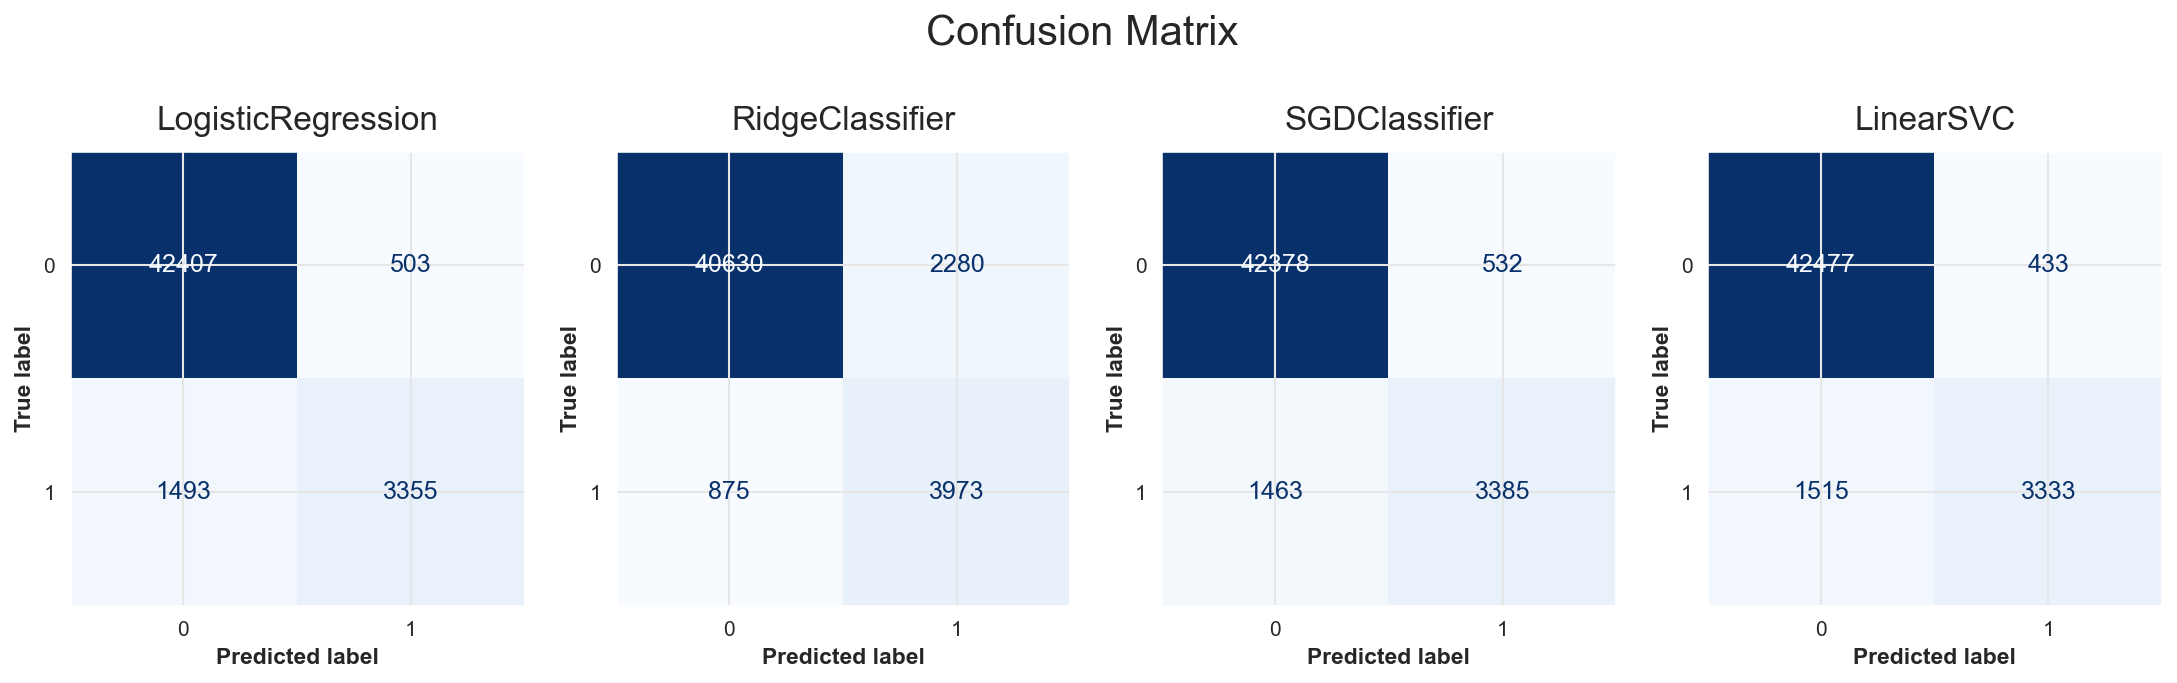

In [61]:
n_plot = models.shape[0]

fig, ax = plt.subplots(figsize=(18,5), ncols=n_plot, dpi=PLOT_DPI)
fig.suptitle('Confusion Matrix', fontsize=20)

for item in range(models.shape[0]):
    
    ConfusionMatrixDisplay.from_estimator(models.loc[item,'model'].fit(X_train, Y_train),
                                          X_valid, Y_valid,
                                          ax=ax[item], colorbar=False, cmap='Blues')
    ax[item].set_title(f"{models.loc[item,'name']}")

> Наглядный анализ в продолжение вывода предыдущего раздела.
>
> Отстающая (по метрике `f1`) модель показала наибольшее количество правильных прогнозов для класса `toxic=1`, ценой некоторого снижения точности прогноза.
> 
> Возможно, заказчику больше подходит более полное выявление токсичных текстов при несколько большем объеме модерации.
>
> Оптимизация моделей с метрикой `recall` может улучшить выявление токсичных текстов, не увеличивая объема модерации.

### Class Prediction Error

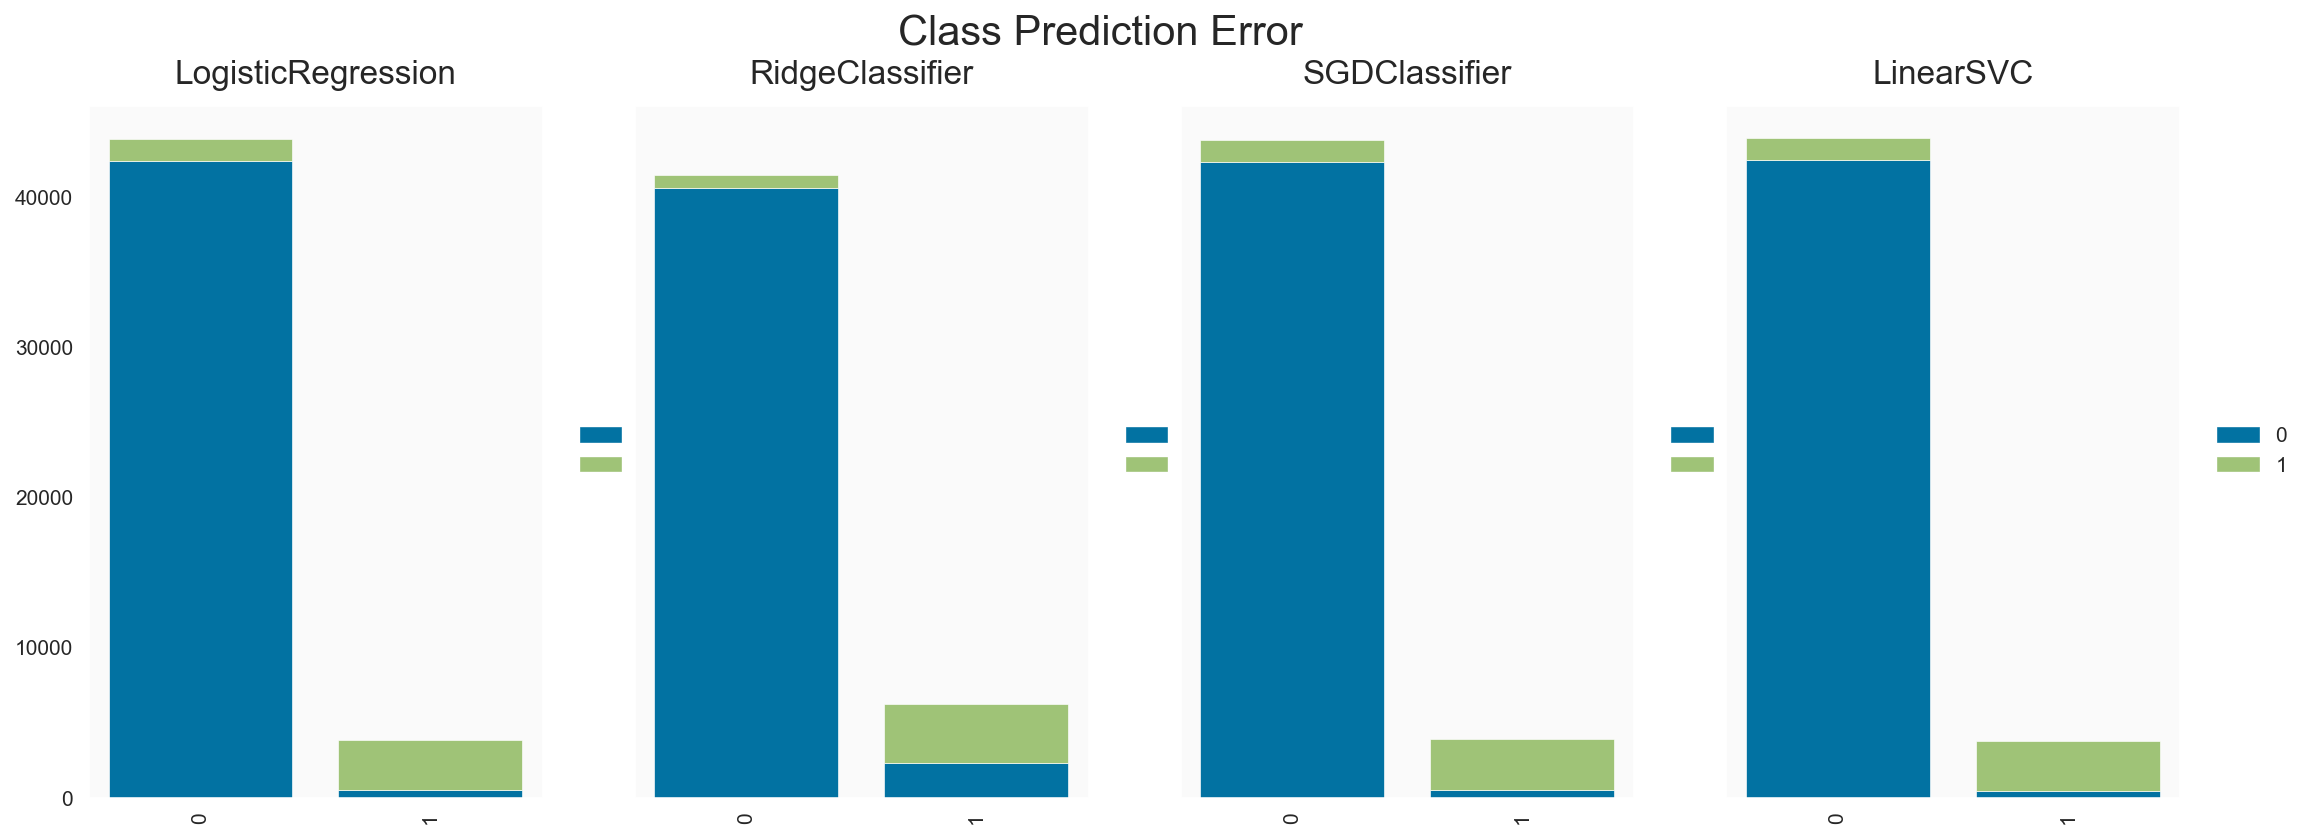

In [62]:
n_plot = models.shape[0]

fig, ax = plt.subplots(figsize=(18,6), ncols=n_plot, dpi=PLOT_DPI, sharey=True)
fig.suptitle('Class Prediction Error', fontsize=20)

for item in range(n_plot):
    viz = ClassPredictionError(
                               models.loc[item,'model'].fit(X_train, Y_train),
                               classes=sorted(Y_train.unique()),  # тонкий момент: правильно вынуть названия классов
                               ax=ax[item],
                              )
    viz.fit(X_train, Y_train)
    viz.score(X_valid, Y_valid)
    ax[item].grid(False)    
    ax[item].set_title(f"{models.loc[item,'name']}")
    
plt.show()

> Для визуальной оценки, сколько токсичных текстов пропускает каждая из моделей, и на сколько увеличивается объем модерации текстов, определенных как токсичные.

### Выбор лучшей модели

In [63]:
SCORE_FIELD = 'score'      # название поля для выбора лучшей модели
LESS_IS_BETTER = False     # для направления сортировки

# название модели с лучшим score, полученным при кроссвалидации
best_model_name = models.sort_values(SCORE_FIELD, ascending=LESS_IS_BETTER).reset_index(drop=True).loc[0,'name']

# выбор модели из таблицы
model = models[models.name == best_model_name].model.values[0]

In [64]:
best_model_name

'SGDClassifier'

---

## Вывод

### Краткий обзор проделанной работы

1. Проведено первичное исследование данных.
1. Выполнен краткий анализ корректности разметки данных.
1. Подготовлены данные для модели.
1. Созданы и сравнены несколько моделей.
1. Проанализировано качество моделей.
1. Даны рекомендации для дальнейшего развития проекта.

### Проверка и подготовка данных

Исправлено небольшое количество ошибок в данных. Например, иногда в данные попадают служебные сообщения, есть некоторое количество неявных дубликатов.

Выполнена краткая проверка корректности разметки данных.  
Выявлено, что есть тексты с чрезмерным употреблением восклицательного знака, вопросительного знака и заглавных букв, которые не отмечены как токсичные. Выборочный просмотр показал, что есть тексты агрессивной тональности, также не отмеченные как токсичные. Всего такие тексты составляют не менее 6% данных. При более углубленном анализе количество ошибок в разметке может оказаться еще больше.

Созданы новые признаки, но ввиду большого количества ошибок в разметке данных они не были использованы при моделировании. В то же время, эти признаки можно использовать для коррекции разметки данных.

Тексты очищены от лишних символов, токенизированы и лемматизированы.

### Моделирование

Ключевую роль в пайплайнах моделей играет TF-IDF-преобразование данных.

Для дальнейшего развития проекта в пайплайн заложена возможность использования новых признаков.

Было протестировано применение n-gram (1,1), (1,2) и (2,2). Улучшения это не принесло при существенном падении скорости обучения моделей.

В результате 3 модели показали очень близкие результаты по заданной метрике `f1`. Однако есть определенные сомнения, что данная метрика соответствует потребностям заказчика. Если для заказчика важнее полное выявление токсичных текстов, то для оптимизации моделей рекомендуется использовать метрику `recall`.

### Риски и рекомендации

1. Содержание входных данных никак не вяжется с фразой "*Интернет-магазин «Викишоп» запускает новый сервис*". Поэтому проблематично извлечь из данных дополнительную информацию, которая помогла бы в решении задачи. Например, определить критерии токсичности.
1. Не определены критерии токсичности. Это затрудняет проверку качества разметки данных.
1. Разметка данных содержит очевидные ошибки (даже несмотря на отсутствие критериев токсичности). Улучшение качества разметки — самый очевидный способ повышения качества модели.
1. Имея критерии токсичности можно создать новые признаки для повышения качества модели. Кроме того, их можно использовать для исправления ошибок в разметке данных.
1. В данных есть существенный дисбаланс классов. Прежде, чем решать эту проблему, следует, насколько возможно, исправить ошибки разметки данных. После этого проблема дисбаланса может заметно ослабнуть.
1. На фоне дисбаланса классов особенно заметен неправильный выбор метрики. Вероятно, для целей заказчика лучше подойдет использование метрики `recall`.
1. Для подготовки данных можно применить более продвинутые методы обработки текстов: **SpaCy, BERT**.